<a href="https://colab.research.google.com/github/andronikmk/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [x] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [x] Begin with baselines for classification.
- [x] Use scikit-learn for logistic regression.
- [x] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [x] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import numpy as np
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [162]:
df

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,1/24/2016,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,1/24/2016,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,1/24/2016,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,1/27/2016,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Other,8/27/2019,NaN,NaN,NaN,6.00,1.0,NaN,NaN,17.0,20.5,0.57,5.0,4.0,3.5,NaN,4.0,4.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,Other,8/27/2019,NaN,NaN,NaN,6.00,4.0,NaN,NaN,19.0,26.0,1.02,4.0,5.0,NaN,3.5,4.0,4.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
420,California,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,20.0,22.0,0.77,4.0,4.0,4.0,3.7,3.0,2.0,3.5,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
421,Other,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,22.5,24.5,1.07,5.0,2.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [163]:
# Convert to datetime and look at date range
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Date'].describe()

count                     421
unique                    169
top       2016-08-30 00:00:00
freq                       29
first     2011-05-16 00:00:00
last      2026-04-25 00:00:00
Name: Date, dtype: object

In [164]:
# train/validate/test split. 
train = df[df.Date.dt.year <= 2016]
val = df[df.Date.dt.year == 2017]
test = df[df.Date.dt.year >= 2018]
train.shape, val.shape, test.shape

((298, 59), (85, 59), (38, 59))

In [165]:
# baselines for classification
# Most burritos are not great
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)

False    0.590604
True     0.409396
Name: Great, dtype: float64

In [0]:
# Majority class = False (most burritos are not great)
majority_class = y_train.mode()[0]

# Multiplying False by the length of the array
y_pred = [majority_class] * len(y_train)

In [0]:
from sklearn.metrics import accuracy_score

In [168]:
# compare your results with the 'manual' method
# accuracy is similar
accuracy_score(y_train, y_pred)

0.5906040268456376

In [169]:
# validation of accuracy of majority class for val
# should be similar to above result...
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

##Part Two##

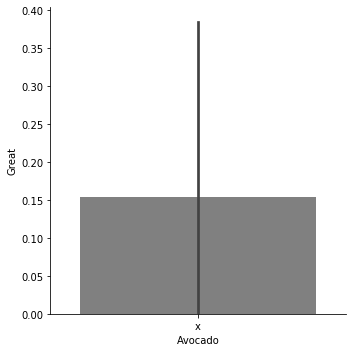

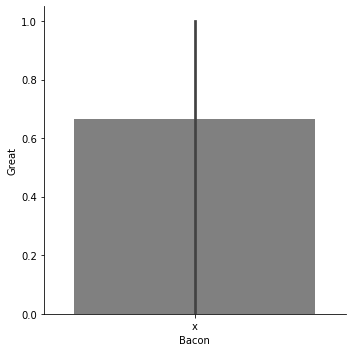

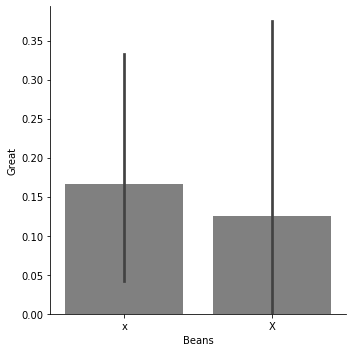

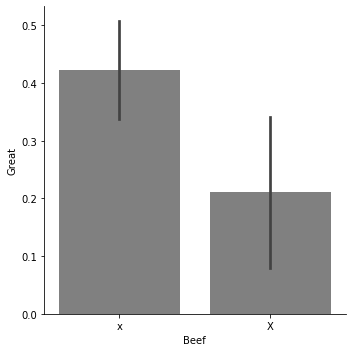

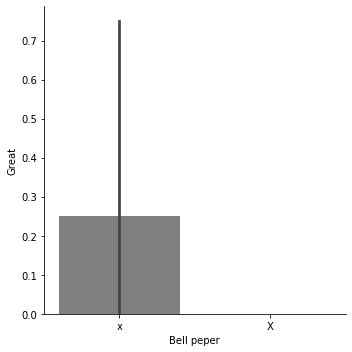

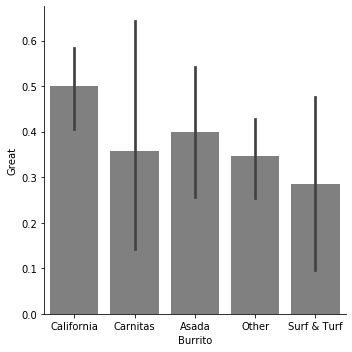

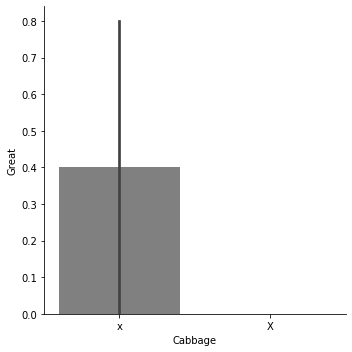

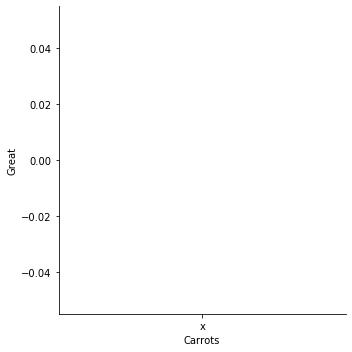

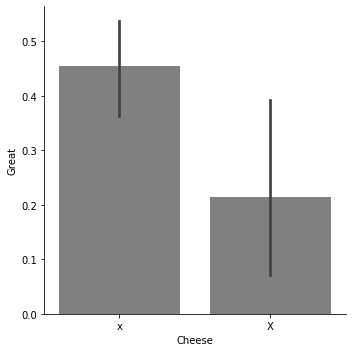

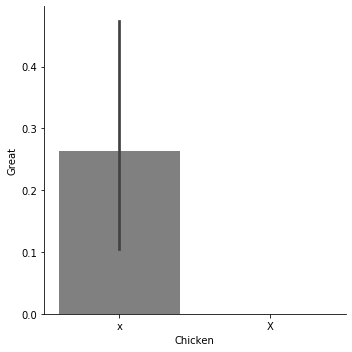

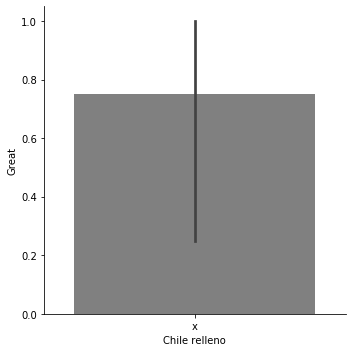

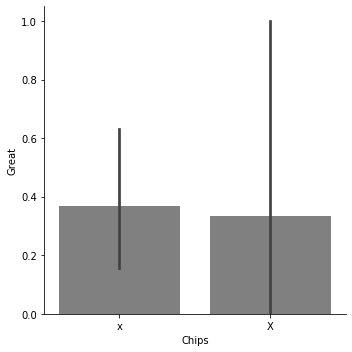

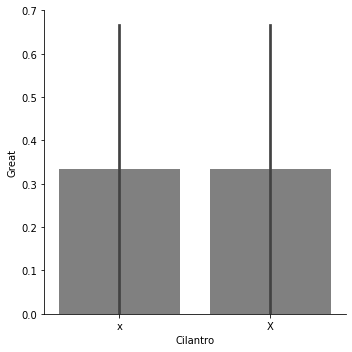

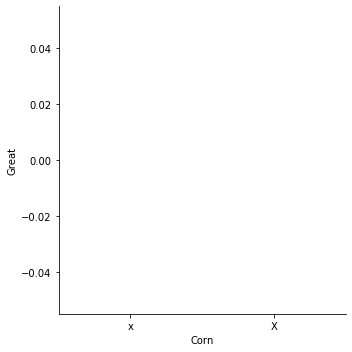

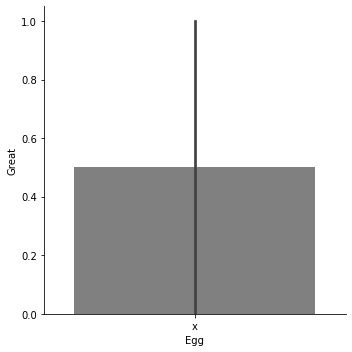

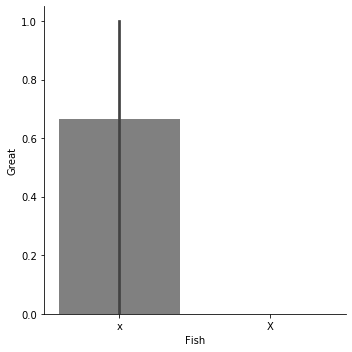

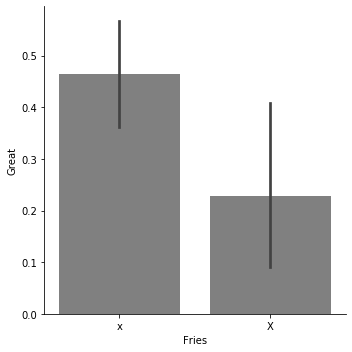

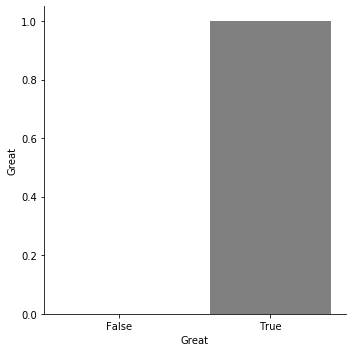

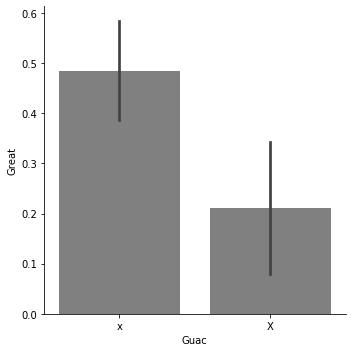

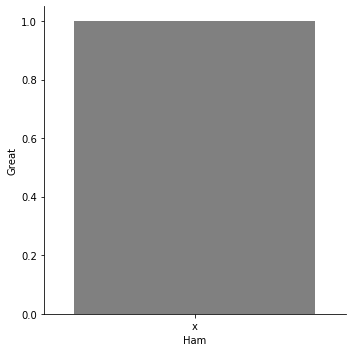

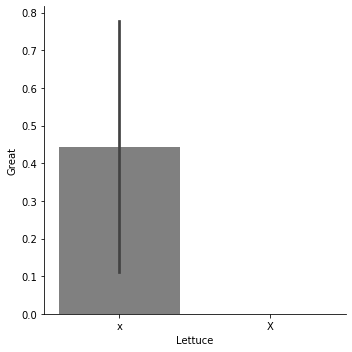

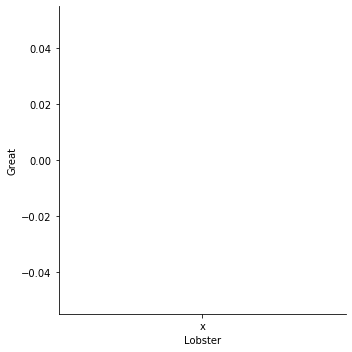

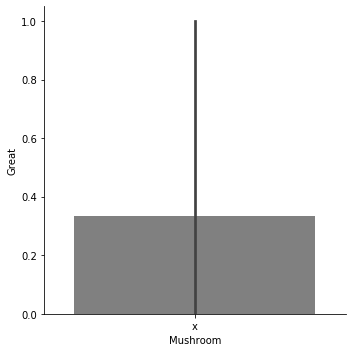

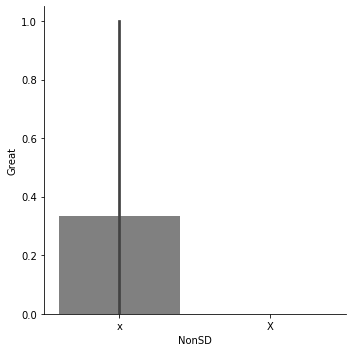

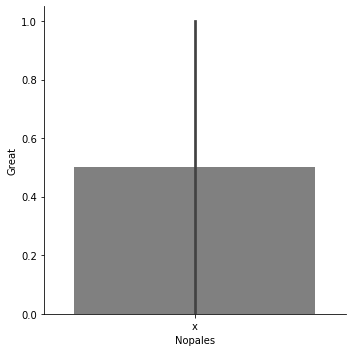

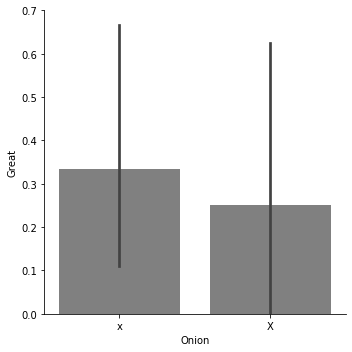

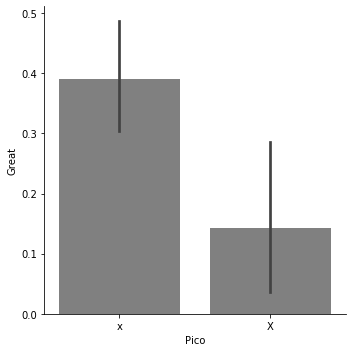

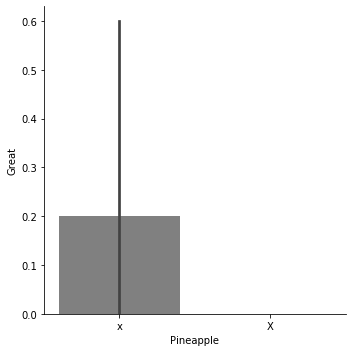

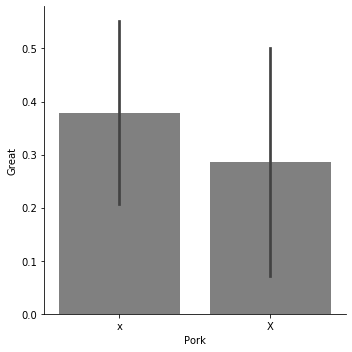

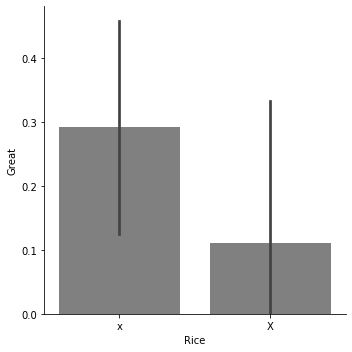

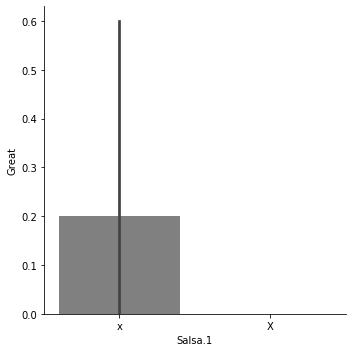

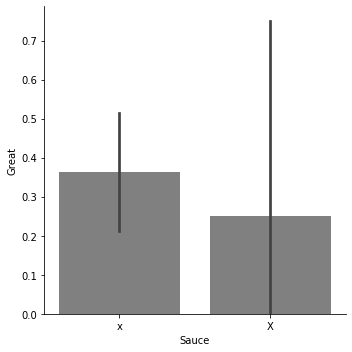

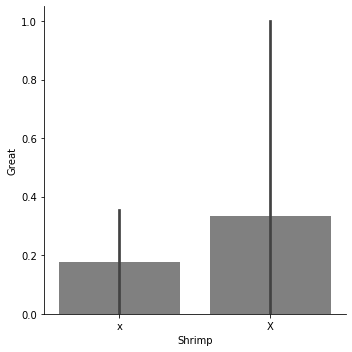

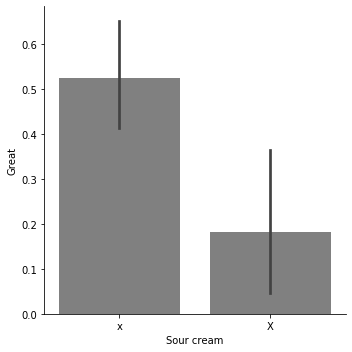

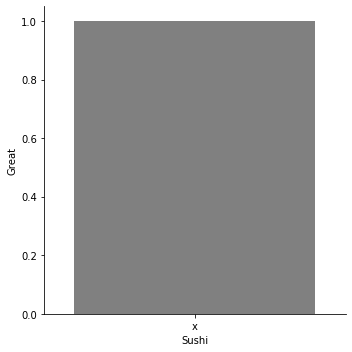

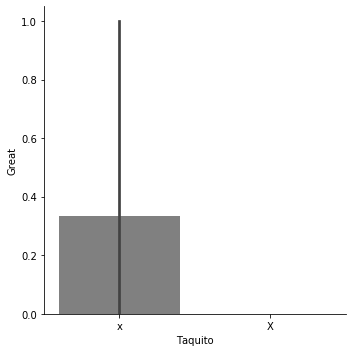

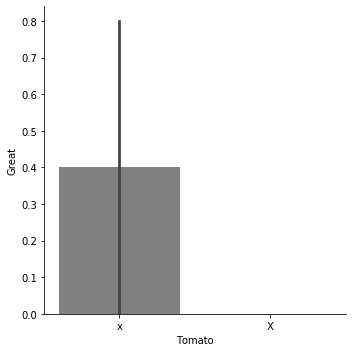

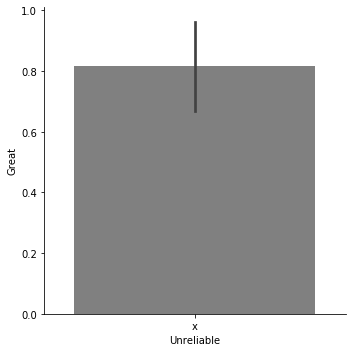

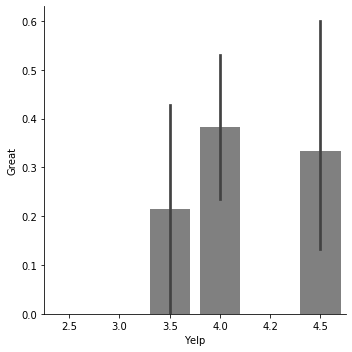

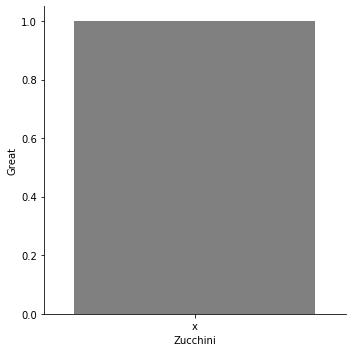

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for col in sorted(train.columns):
    if train[col].nunique() < 10:
        try:
            sns.catplot(x=col, y='Great', data=train, kind='bar', color='grey')
            plt.show()
        except:
            pass

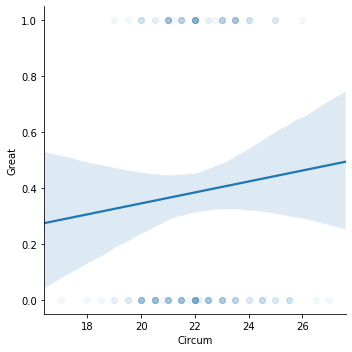

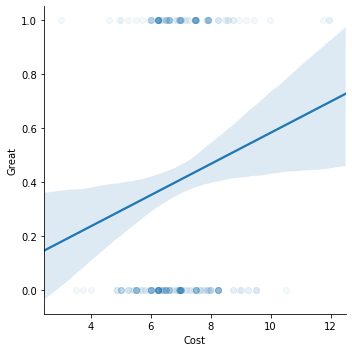

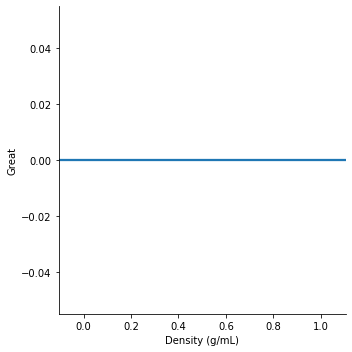

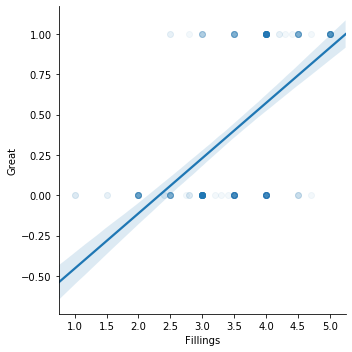

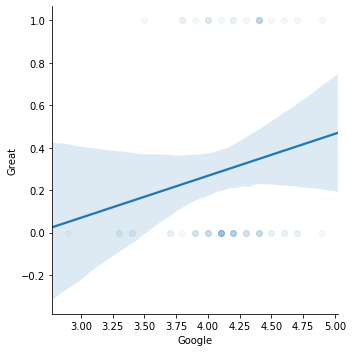

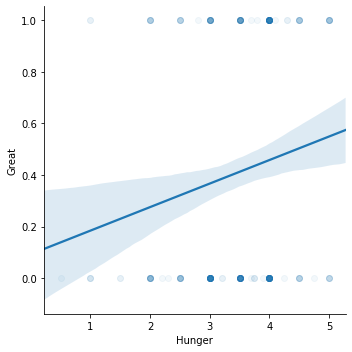

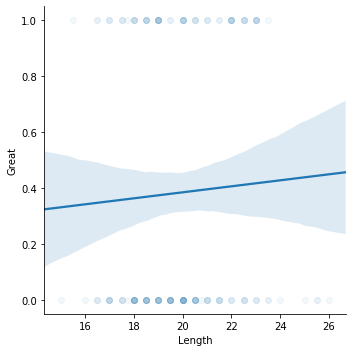

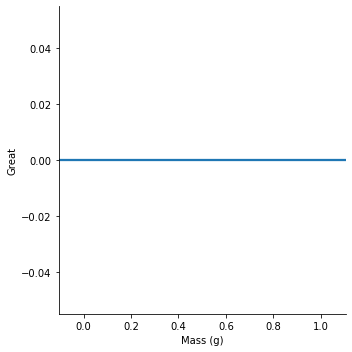

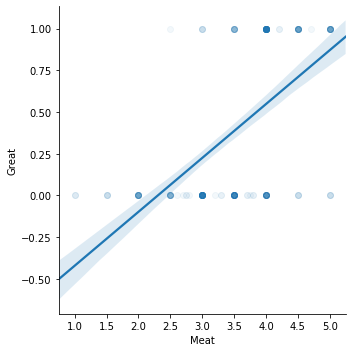

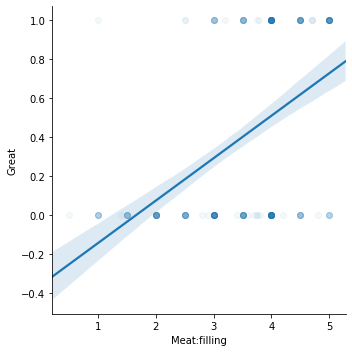

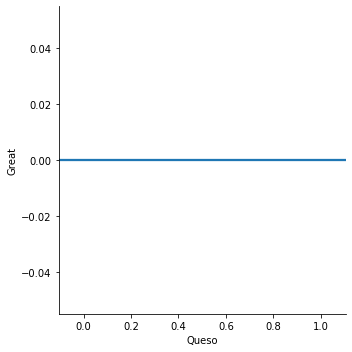

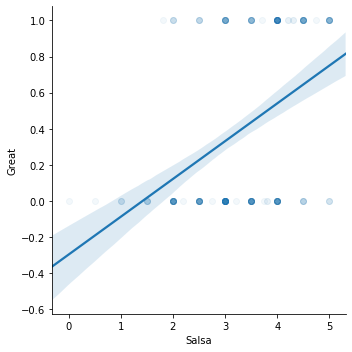

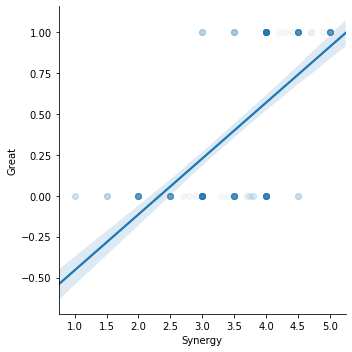

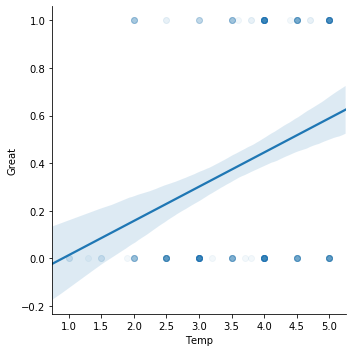

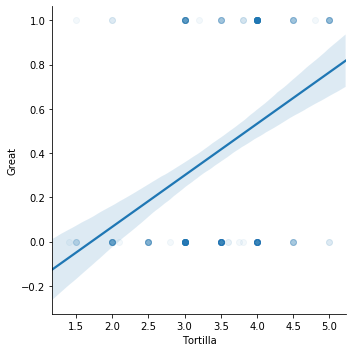

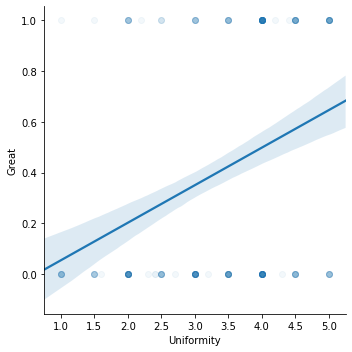

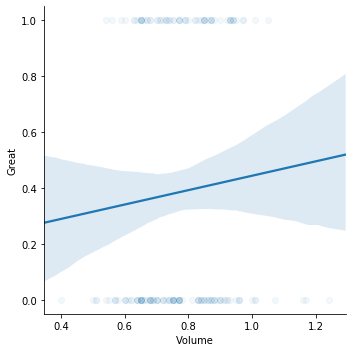

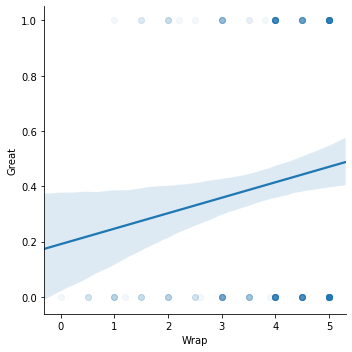

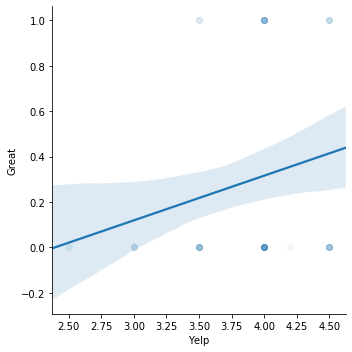

In [171]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='Great', data=train, scatter_kws=dict(alpha=0.05))
    plt.show()

In [185]:
# cardinality of non-numeric features
# cut of at 50...
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
Chile relleno,4,1,x,4,NaT,NaT
Ham,1,1,x,1,NaT,NaT
Zucchini,1,1,x,1,NaT,NaT
Nopales,4,1,x,4,NaT,NaT
Lobster,1,1,x,1,NaT,NaT
Egg,4,1,x,4,NaT,NaT
Carrots,1,1,x,1,NaT,NaT
Bacon,3,1,x,3,NaT,NaT
Sushi,2,1,x,2,NaT,NaT
Unreliable,27,1,x,27,NaT,NaT


In [186]:
train

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,2016-01-18,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,2016-01-24,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,2016-01-24,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,2016-01-24,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,2016-01-27,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,California,2016-12-02,4.0,4.3,NaN,5.65,3.0,NaN,NaN,19.5,22.0,0.75,4.0,1.5,2.0,3.0,4.2,4.0,3.0,2.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
297,Other,2016-12-02,NaN,NaN,NaN,5.49,3.0,NaN,NaN,19.0,20.5,0.64,4.5,5.0,2.0,2.0,2.5,3.5,3.0,2.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
298,California,2016-12-10,3.5,3.7,NaN,7.75,4.0,NaN,NaN,20.0,21.0,0.70,3.5,2.5,3.0,3.3,1.4,2.3,2.2,3.3,4.5,NaN,NaN,X,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
299,Asada,2016-12-10,NaN,NaN,NaN,7.75,4.0,NaN,NaN,19.5,21.0,0.68,4.0,4.5,2.0,2.0,3.5,3.5,2.0,2.0,4.0,NaN,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [0]:
date = 'Date'
numerics = train.select_dtypes(include='number').columns.tolist()
categoricals = train.select_dtypes(exclude='number').columns.drop(date).tolist()
low_cardinality_categoricals = [col for col in categoricals
                               if train[col].nunique() <= 50]

features = numerics + low_cardinality_categoricals

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [0]:
import category_encoders as ce

In [222]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso,Burrito_California,Burrito_Carnitas,Burrito_Asada,Burrito_Other,Burrito_Surf & Turf,Chips_nan,Chips_x,Chips_X,Unreliable_nan,Unreliable_x,NonSD_nan,NonSD_x,NonSD_X,Beef_x,Beef_nan,Beef_X,Pico_x,Pico_nan,Pico_X,Guac_x,Guac_nan,...,Sauce_X,Salsa.1_nan,Salsa.1_x,Salsa.1_X,Cilantro_nan,Cilantro_x,Cilantro_X,Onion_nan,Onion_x,Onion_X,Taquito_nan,Taquito_x,Taquito_X,Pineapple_nan,Pineapple_x,Pineapple_X,Ham_nan,Ham_x,Chile relleno_nan,Chile relleno_x,Nopales_nan,Nopales_x,Lobster_nan,Lobster_x,Egg_nan,Egg_x,Mushroom_nan,Mushroom_x,Bacon_nan,Bacon_x,Sushi_nan,Sushi_x,Avocado_nan,Avocado_x,Corn_nan,Corn_x,Corn_X,Zucchini_nan,Zucchini_x,Great
0,3.5,4.2,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
1,3.5,3.3,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
2,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,NaN,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
3,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,NaN,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
4,4.0,3.8,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,NaN,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,True


In [224]:
X_val_encoded

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso,Burrito_California,Burrito_Carnitas,Burrito_Asada,Burrito_Other,Burrito_Surf & Turf,Chips_nan,Chips_x,Chips_X,Unreliable_nan,Unreliable_x,NonSD_nan,NonSD_x,NonSD_X,Beef_x,Beef_nan,Beef_X,Pico_x,Pico_nan,Pico_X,Guac_x,Guac_nan,...,Sauce_X,Salsa.1_nan,Salsa.1_x,Salsa.1_X,Cilantro_nan,Cilantro_x,Cilantro_X,Onion_nan,Onion_x,Onion_X,Taquito_nan,Taquito_x,Taquito_X,Pineapple_nan,Pineapple_x,Pineapple_X,Ham_nan,Ham_x,Chile relleno_nan,Chile relleno_x,Nopales_nan,Nopales_x,Lobster_nan,Lobster_x,Egg_nan,Egg_x,Mushroom_nan,Mushroom_x,Bacon_nan,Bacon_x,Sushi_nan,Sushi_x,Avocado_nan,Avocado_x,Corn_nan,Corn_x,Corn_X,Zucchini_nan,Zucchini_x,Great
301,NaN,NaN,6.60,NaN,NaN,NaN,23.0,20.5,0.77,4.0,4.5,4.0,3.5,3.5,5.0,1.5,3.50,4.5,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
302,NaN,NaN,6.60,NaN,NaN,NaN,20.5,21.5,0.75,4.0,2.0,NaN,4.0,NaN,4.6,4.2,3.75,5.0,NaN,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
303,NaN,NaN,8.50,3.9,NaN,NaN,21.0,21.0,0.74,3.0,4.5,4.1,3.0,3.7,4.0,4.3,4.20,5.0,NaN,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
304,NaN,NaN,7.90,4.0,NaN,NaN,20.5,21.0,0.72,3.5,4.0,4.0,3.0,4.0,4.5,4.0,3.80,4.8,NaN,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
305,NaN,NaN,4.99,3.5,NaN,NaN,18.5,22.5,0.75,2.5,4.5,3.0,2.5,3.0,3.0,2.0,2.00,4.0,NaN,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,NaN,NaN,6.85,3.5,NaN,NaN,22.5,22.5,0.91,3.0,4.5,3.8,3.8,4.0,3.5,3.5,4.00,3.0,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,True
382,NaN,NaN,6.85,3.5,NaN,NaN,22.2,22.5,0.89,3.0,4.5,4.0,4.0,4.5,3.0,4.0,4.00,3.5,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,True
383,4.0,4.5,11.50,3.5,NaN,NaN,15.0,25.0,0.75,2.0,2.0,4.0,3.5,3.0,4.5,3.5,4.00,2.0,NaN,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,False
384,NaN,NaN,7.89,4.0,NaN,NaN,19.0,23.0,0.80,4.0,3.0,4.0,4.0,3.0,4.0,3.5,4.30,4.5,NaN,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,True


In [0]:
# impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)


In [226]:
# 4. Fit the model
linear_reg.fit(X_train_imputed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
# 5. Apply the model to new data.
# The predictions look like this ...
linear_reg.predict(X_val_imputed)

array([ 9.50628465e-16, -2.70616862e-16, -7.42461648e-16, -7.97972799e-16,
       -1.87350135e-16, -1.14491749e-15,  1.00000000e+00, -7.63278329e-17,
       -8.53483950e-16,  1.00000000e+00,  1.00000000e+00, -2.42861287e-16,
       -4.78783679e-16, -1.31838984e-16,  1.00000000e+00,  1.00000000e+00,
        2.70616862e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -3.26128013e-16, -7.63278329e-17,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  8.67361738e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.54752284e-03,
        1.00000000e+00, -1.73472348e-16,  6.03683770e-16,  4.09394740e-16,
       -7.00828284e-16,  1.00000000e+00, -6.59194921e-16,  7.63278329e-17,
        7.28583860e-16, -2.54752284e-03,  6.45317133e-16,  1.00000000e+00,
        1.00000000e+00,  7.63278329e-17,  2.98372438e-16,  1.45716772e-16,
        1.00000000e+00,  1.07552856e-15,  7.63278329e-17,  6.93889390e-18,
        1.00000000e+00,  

In [0]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [229]:
log_reg = LogisticRegression()
log_reg.fit(X_train_imputed, y_train)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

Validation Accuracy 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [230]:
# prediction
log_reg.predict(X_val_imputed)

array([False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True])

In [233]:
# coef
log_reg.coef_

array([[ 7.09248916e-02,  4.09635959e-03,  1.91867460e-01,
         9.28037008e-02,  9.83901081e-02,  4.65952769e-02,
         6.22947740e-03,  3.93666951e-01,  3.75058763e-01,
         8.51280065e-01,  7.18372920e-01,  7.31228498e-01,
         5.65509692e-02,  1.93675413e-01,  9.40968993e-01,
         8.65397559e-02,  2.74530499e-01,  5.54615377e-02,
        -6.30759007e-02, -2.74902874e-01,  6.45910992e-03,
        -1.73056485e-02,  1.87244517e-02, -2.94643112e-03,
        -1.41278232e-01,  1.39750605e-01, -2.18685490e-02,
         2.17210516e-02, -1.38013053e-03, -1.08347348e-02,
         1.84874882e-01, -1.75567775e-01, -1.53132758e-01,
         2.39080124e-01, -8.74749941e-02,  2.20847696e-01,
        -1.61088589e-01, -6.12867354e-02,  3.06698355e-02,
         9.37991217e-02, -1.25996585e-01, -2.36175164e-02,
         1.22560938e-01, -1.00471050e-01, -6.37379238e-02,
         2.00805418e-01, -1.38595123e-01, -1.04194259e-01,
         2.07047465e-02,  8.19618840e-02,  9.70543559e-0

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [244]:
model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 1.0


In [0]:
test_case = [[1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1]] 

In [250]:
log_reg.predict(test_case)

array([False])